
## Introduction

Ce notebook a pour objectif de préparer et d'explorer les données avant d'appliquer différentes méthodes de machine learning. Les étapes principales incluront :

1. **Nettoyage des données** : Identifier et traiter les valeurs manquantes, vérifier les doublons, et s'assurer de la qualité des données.
2. **Visualisation des données** : Explorer les relations entre les variables, analyser les distributions, et identifier les corrélations importantes.
3. **Application des modèles de machine learning** :
    - **XGBoost** : Un algorithme de gradient boosting performant pour les tâches de classification.
    - **Régression logistique avec Lasso** : Une méthode de régression pénalisée pour la sélection de variables.
    - **MLP (Multi-Layer Perceptron)** : Un réseau de neurones pour capturer des relations complexes.
    - **Random Forest** : Un ensemble d'arbres de décision pour une classification robuste.

L'objectif final est de comparer les performances de ces modèles et de sélectionner celui qui offre les meilleurs résultats pour la prédiction du diabète. 
```

In [2]:


!pip install --quiet --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0



DEPRECATION: Loading egg at c:\users\thoma\appdata\local\programs\python\python312\lib\site-packages\batchnorm.py-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline



In [3]:
data_path='data/'

df1 = pd.read_csv(data_path + 'diabetes_012_health_indicators_BRFSS2015.csv')
df2 =  pd.read_csv(data_path + 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 =  pd.read_csv(data_path + 'diabetes_binary_health_indicators_BRFSS2015.csv')


In [4]:
display(df1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
display(df2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [6]:
display(df3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0



### Différences entre les trois jeux de données

1. **diabetes_012_health_indicators_BRFSS2015.csv** :
    - **Taille** : 253,680 réponses.
    - **Variable cible** : `Diabetes_012` avec **3 classes** :
      - `0` : Pas de diabète ou diabète uniquement pendant la grossesse.
      - `1` : Pré-diabète.
      - `2` : Diabète.
    - **Problème** : Déséquilibre des classes.
    - **Nombre de variables** : 21 variables explicatives.

2. **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** :
    - **Taille** : 70,692 réponses.
    - **Variable cible** : `Diabetes_binary` avec **2 classes** :
      - `0` : Pas de diabète.
      - `1` : Pré-diabète ou diabète.
    - **Avantage** : Jeu de données équilibré avec une répartition 50-50 entre les classes.
    - **Nombre de variables** : 21 variables explicatives.

3. **diabetes_binary_health_indicators_BRFSS2015.csv** :
    - **Taille** : 253,680 réponses.
    - **Variable cible** : `Diabetes_binary` avec **2 classes** :
      - `0` : Pas de diabète.
      - `1` : Pré-diabète ou diabète.
    - **Problème** : Déséquilibre des classes.
    - **Nombre de variables** : 21 variables explicatives.

### Choix du jeu de données

Nous choisirons d'utiliser le **deuxième jeu de données** (`diabetes_binary_5050split_health_indicators_BRFSS2015.csv`) pour les raisons suivantes :
- Il est **équilibré**, ce qui est essentiel pour entraîner un modèle de machine learning sans introduire de biais en faveur de la classe majoritaire.
- La variable cible est binaire, ce qui simplifie la tâche de classification.
- Sa taille (70,692 réponses) est suffisante pour entraîner des modèles robustes tout en réduisant les besoins en ressources computationnelles par rapport au premier jeu de données.

In [7]:
# Résumé global du dataframe df2
print("\nStatistiques descriptives (numériques):")
print(df3.describe().T.to_string())


Statistiques descriptives (numériques):
                         count       mean       std   min   25%   50%   75%   max
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   1.0
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   1.0
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   1.0
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   1.0
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0  98.0
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   1.0
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   1.0
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   1.0
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   1.0
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   1.0
Veggies               253680.0   0.811420  0.391175   0.0

### Description des variables

- **Diabetes_binary** : 0 = no diabetes, 1 = prediabetes, 2 = diabetes
- **HighBP** : 0 = no high BP, 1 = high BP
- **HighChol** : 0 = no high cholesterol, 1 = high cholesterol
- **CholCheck** : 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
- **BMI** : Body Mass Index
- **Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
- **Stroke** : (Ever told) you had a stroke. 0 = no, 1 = yes
- **HeartDiseaseorAttack** : Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes
- **PhysActivity** : Physical activity in past 30 days - not including job. 0 = no, 1 = yes
- **Fruits** : Consume fruit 1 or more times per day. 0 = no, 1 = yes
- **Veggies** : Consume vegetables 1 or more times per day. 0 = no, 1 = yes
- **HvyAlcoholConsump** : (Adult men >=14 drinks per week and adult women >=7 drinks per week). 0 = no, 1 = yes
- **AnyHealthcare** : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
- **NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
- **GenHlth** : Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)
- **MentHlth** : Days of poor mental health. Scale 1-30 days
- **PhysHlth** : Physical illness or injury days in past 30 days. Scale 1-30
- **DiffWalk** : Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
- **Sex** : 0 = female, 1 = male
- **Age** : 13-level age category (_AGEG5YR see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older
- **Education** : Education level (EDUCA see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = elementary, etc.)
- **Income** : Income scale (INCOME2 see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)

In [8]:
# Missing values et uniques
miss = df3.isnull().sum()
miss_pct = (miss / len(df3) * 100).round(3)
uniques = df3.nunique()
miss_df = pd.DataFrame({
    "missing_count": miss,
    "missing_pct": miss_pct,
    "n_unique": uniques
})
print("\nMissing / uniques par colonne:")
print(miss_df.sort_values("missing_pct", ascending=False).to_string())
print('on remarque qu il n y a pas de missing values dans ce dataset')


Missing / uniques par colonne:
                      missing_count  missing_pct  n_unique
Diabetes_binary                   0          0.0         2
HighBP                            0          0.0         2
Education                         0          0.0         6
Age                               0          0.0        13
Sex                               0          0.0         2
DiffWalk                          0          0.0         2
PhysHlth                          0          0.0        31
MentHlth                          0          0.0        31
GenHlth                           0          0.0         5
NoDocbcCost                       0          0.0         2
AnyHealthcare                     0          0.0         2
HvyAlcoholConsump                 0          0.0         2
Veggies                           0          0.0         2
Fruits                            0          0.0         2
PhysActivity                      0          0.0         2
HeartDiseaseorAttack    

In [9]:
df3["Diabetes_binary"] = df3["Diabetes_binary"].astype(int)
df3["HighBP"] = df3["HighBP"].astype(int)
df3["HighChol"] = df3["HighChol"].astype(int)
df3["CholCheck"] = df3["CholCheck"].astype(int)
df3["BMI"] = df3["BMI"].astype(int)
df3["Smoker"] = df3["Smoker"].astype(int)
df3["Stroke"] = df3["Stroke"].astype(int)
df3["HeartDiseaseorAttack"] = df3["HeartDiseaseorAttack"].astype(int)
df3["PhysActivity"] = df3["PhysActivity"].astype(int)
df3["Fruits"] = df3["Fruits"].astype(int)
df3["Veggies"] = df3["Veggies"].astype(int)
df3["HvyAlcoholConsump"] = df3["HvyAlcoholConsump"].astype(int)
df3["AnyHealthcare"] = df3["AnyHealthcare"].astype(int)
df3["NoDocbcCost"] = df3["NoDocbcCost"].astype(int)
df3["GenHlth"] = df3["GenHlth"].astype(int)
df3["MentHlth"] = df3["MentHlth"].astype(int)
df3["PhysHlth"] = df3["PhysHlth"].astype(int)
df3["DiffWalk"] = df3["DiffWalk"].astype(int)
df3["Sex"] = df3["Sex"].astype(int)
df3["Age"] = df3["Age"].astype(int)
df3["Education"] = df3["Education"].astype(int)
df3["Income"] = df3["Income"].astype(int)

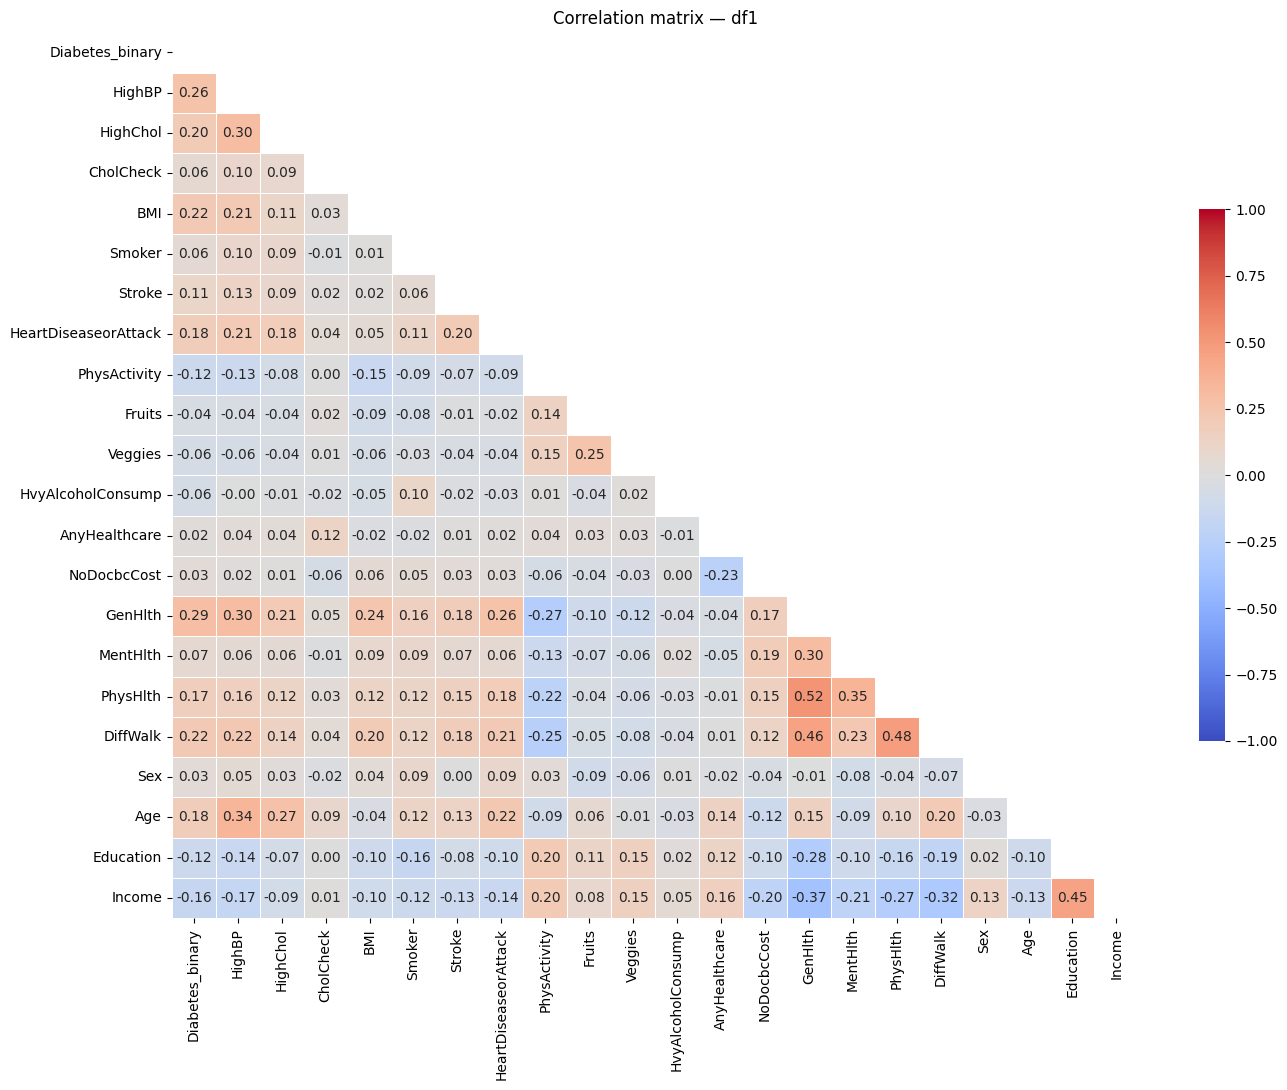

Top positive correlations with 'Diabetes_binary':
 GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315

Top negative correlations with 'Diabetes_binary':
 Income              -0.163919
Education           -0.124456
PhysActivity        -0.118133
HvyAlcoholConsump   -0.057056
Veggies             -0.056584
Fruits              -0.040779
AnyHealthcare        0.016255
Sex                  0.031430
NoDocbcCost          0.031433
Smoker               0.060789


In [10]:
# Correlation matrix and target correlations for df1
corr = df3.corr()

# Heatmap (show upper triangle mask to avoid duplicate values)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 11))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.6}
)
plt.title("Correlation matrix — df1")
plt.tight_layout()
plt.show()

# Print correlations with the target column
target_col = "Diabetes_binary"
if target_col in corr.columns:
    corr_target = corr[target_col].drop(labels=[target_col])
    print("Top positive correlations with '{}':\n".format(target_col), corr_target.sort_values(ascending=False).head(10).to_string())
    print("\nTop negative correlations with '{}':\n".format(target_col), corr_target.sort_values().head(10).to_string())
else:
    print(f"Target column '{target_col}' not found in df1. Available columns:\n{list(df1.columns)}")

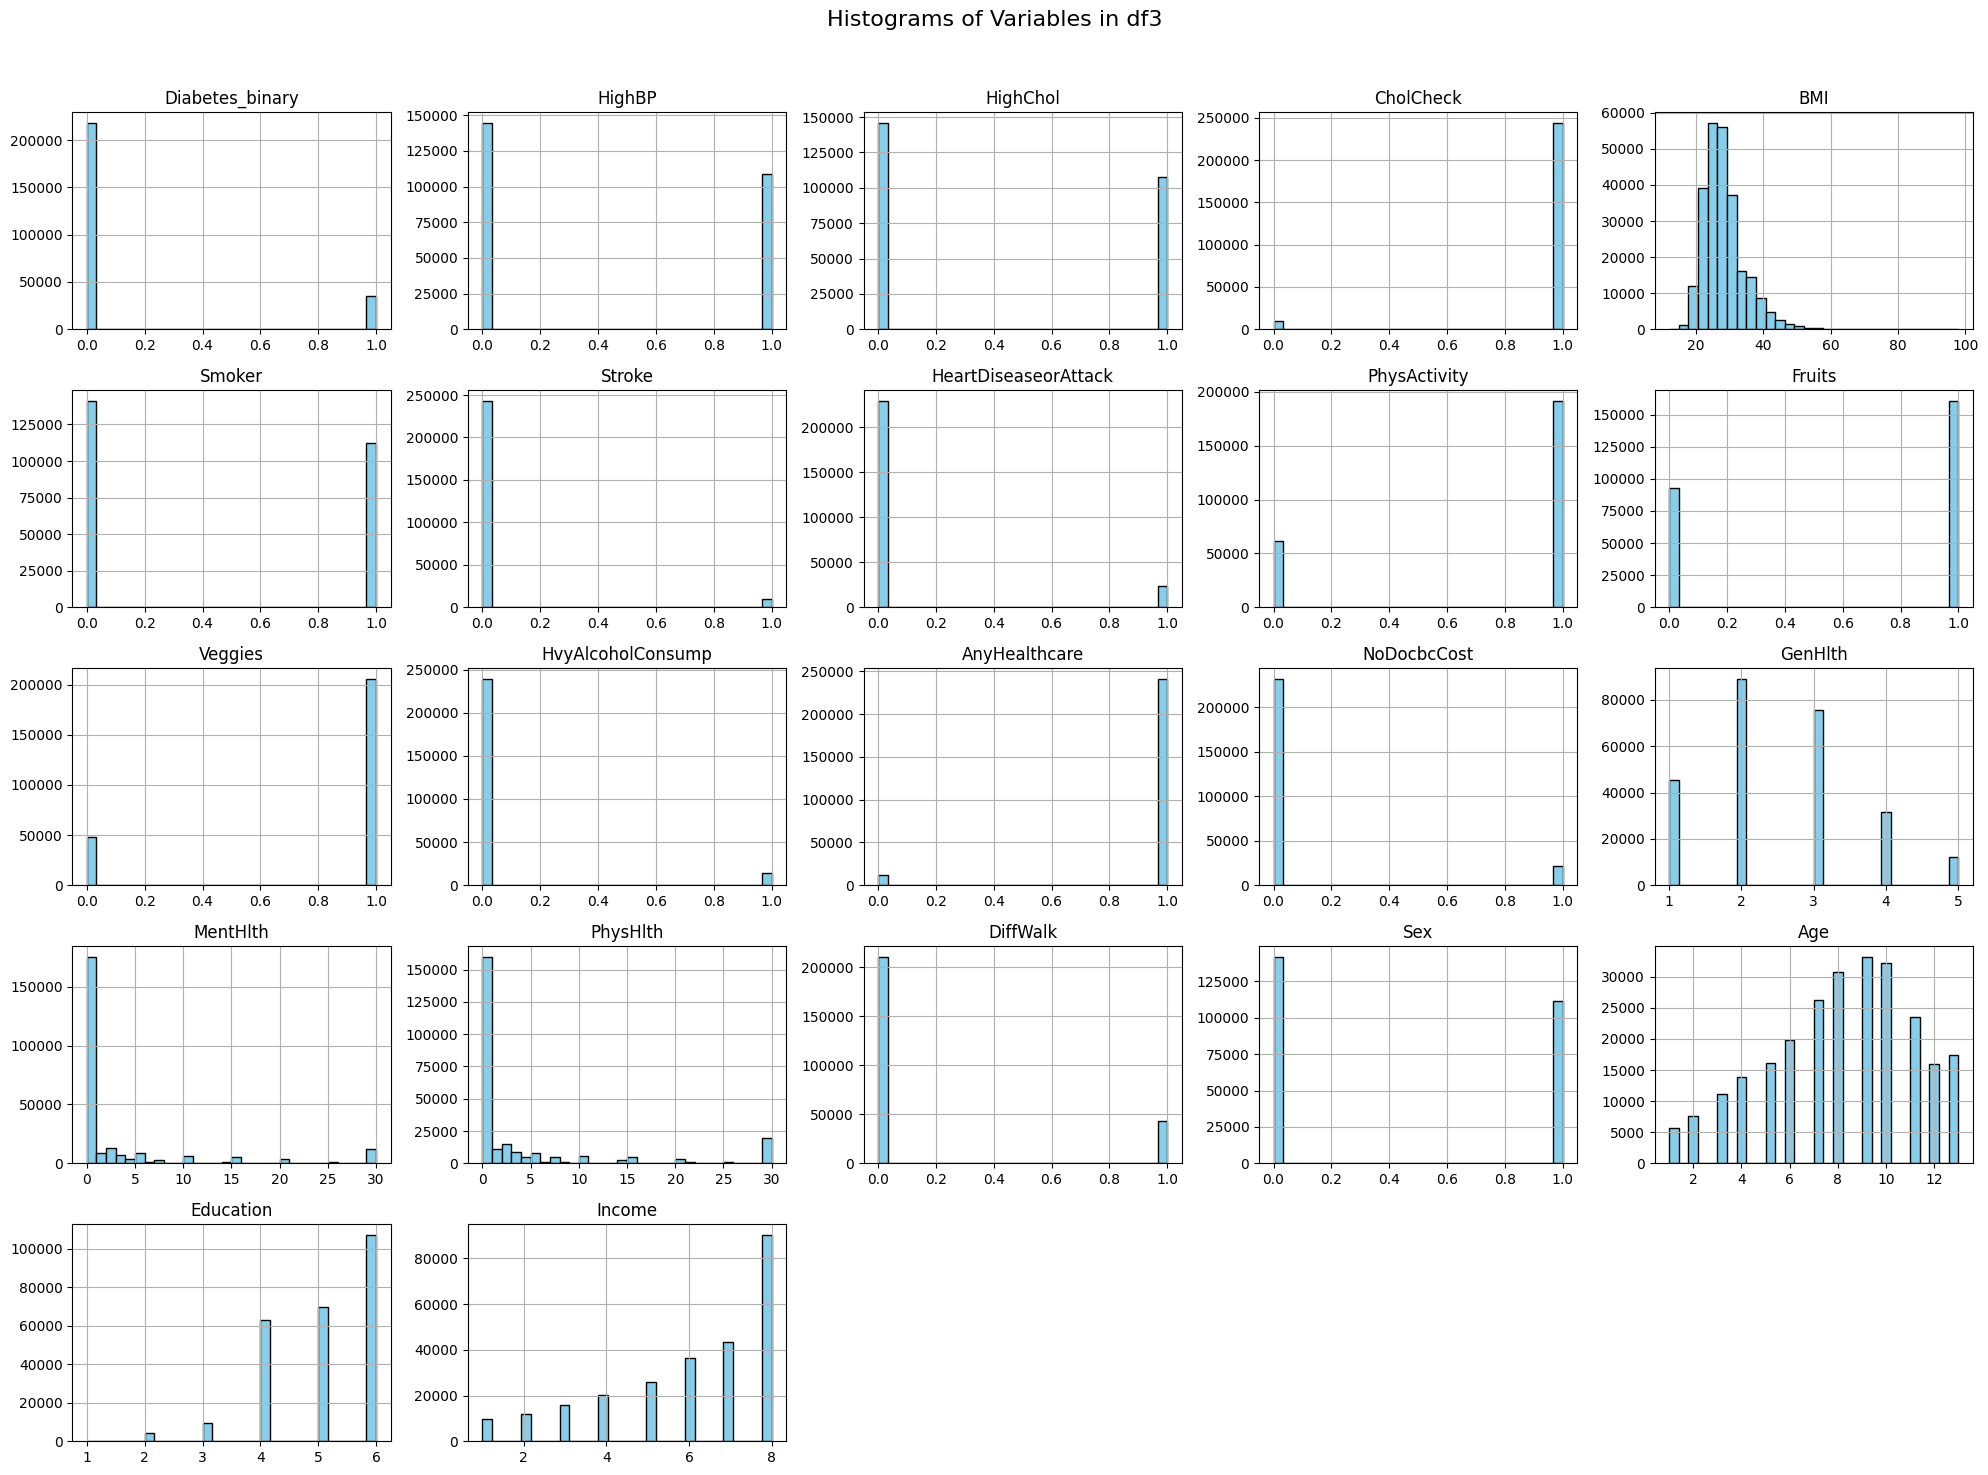

In [11]:
df3.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Variables in df3", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

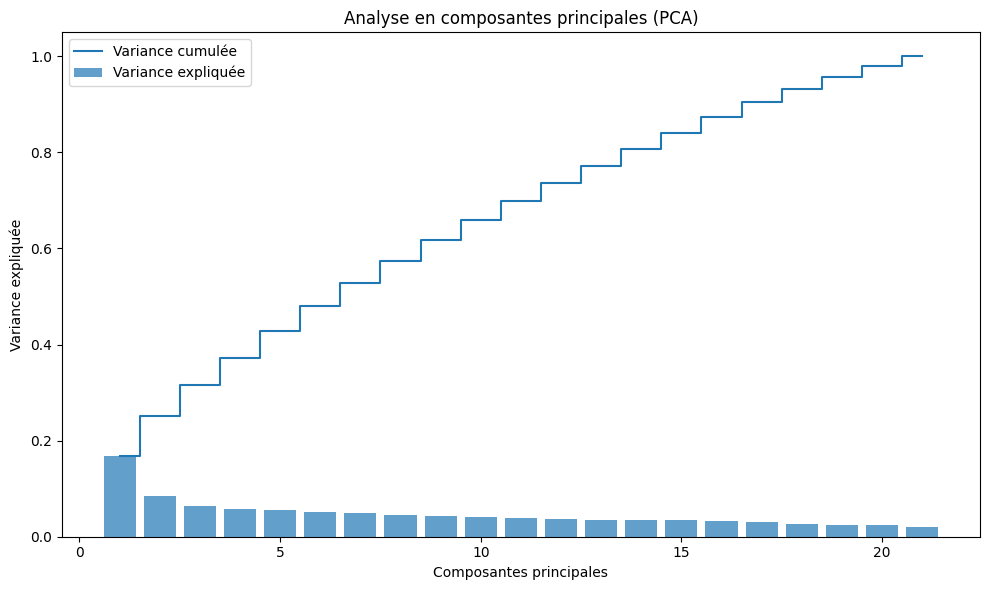

Variance expliquée par chaque composante principale:
Composante 1: 0.1671
Composante 2: 0.0840
Composante 3: 0.0648
Composante 4: 0.0567
Composante 5: 0.0551
Composante 6: 0.0518
Composante 7: 0.0492
Composante 8: 0.0452
Composante 9: 0.0440
Composante 10: 0.0419
Composante 11: 0.0386
Composante 12: 0.0377
Composante 13: 0.0356
Composante 14: 0.0349
Composante 15: 0.0339
Composante 16: 0.0335
Composante 17: 0.0317
Composante 18: 0.0266
Composante 19: 0.0243
Composante 20: 0.0235
Composante 21: 0.0201


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisation des données
features = df3.drop(columns=[target_col])  # Exclure la variable cible
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de la PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Variance expliquée')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Analyse en composantes principales (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Afficher les composantes principales
print("Variance expliquée par chaque composante principale:")
for i, var in enumerate(explained_variance, 1):
    print(f"Composante {i}: {var:.4f}")

Ces résultats montrent la proportion de variance expliquée par chaque composante principale dans l'analyse en composantes principales (PCA). Voici quelques observations :

1. **Composante principale 1** : Elle explique environ **17.33%** de la variance totale, ce qui en fait la composante la plus importante. Cependant, elle n'explique pas une majorité de la variance, ce qui indique que les données sont dispersées sur plusieurs dimensions.

2. **Diminution progressive de la variance expliquée** : Les composantes suivantes expliquent de moins en moins de variance. Par exemple, la composante 2 explique **8.25%**, la composante 3 **6.35%**, et ainsi de suite.

3. **Variance cumulée** : En additionnant les variances expliquées, on peut déterminer combien de composantes sont nécessaires pour expliquer une proportion significative de la variance totale. Par exemple :
    - Les 5 premières composantes expliquent environ **43.3%** de la variance totale.
    - Les 10 premières composantes expliquent environ **64.8%** de la variance totale.

4. **Grand nombre de dimensions nécessaires** : Puisque chaque composante explique une faible proportion de la variance, cela suggère que les données sont relativement complexes et qu'il n'y a pas de forte redondance entre les variables.

5. **Réduction de la dimensionnalité** : Si l'objectif est de réduire la dimensionnalité tout en conservant une grande partie de l'information, il pourrait être judicieux de conserver les premières composantes qui expliquent, par exemple, **80-90%** de la variance.

En résumé, ces résultats indiquent que les données sont multidimensionnelles et qu'une réduction de dimensionnalité nécessiterait de conserver plusieurs composantes pour préserver une part significative de l'information.

### Choix des variables pour les modèles de Machine Learning

À la vue des résultats de l'Analyse en Composantes Principales (PCA), il apparaît que chaque composante principale explique une faible proportion de la variance totale. Cela indique que les données sont dispersées sur plusieurs dimensions et qu'aucune composante unique ou combinaison réduite de composantes ne capture une part significative de l'information.

Par conséquent, nous avons décidé de **conserver toutes les variables** dans leur état initial pour appliquer nos modèles de Machine Learning. Cette approche garantit que l'ensemble des informations disponibles sera utilisé, ce qui est essentiel pour maximiser les performances des modèles et éviter de perdre des relations importantes entre les variables.

### XGBOOST

In [15]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" ]

df2.drop(colomns , axis= 1 ,inplace=True)



In [16]:
target_col = "Diabetes_binary"
# Séparation des variables explicatives et de la cible
X = df2.drop(columns=[target_col])
y = df2[target_col]

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



In [17]:
X_train

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
52967,0.0,0.0,36.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,4.0,4.0
49049,1.0,1.0,45.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,1.0,13.0,6.0,5.0
40256,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,11.0,3.0,3.0
38372,1.0,0.0,34.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,14.0,1.0,10.0,3.0,2.0
59038,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,14.0,1.0,7.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,4.0,5.0
6265,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,9.0,6.0,8.0
54886,1.0,1.0,23.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,11.0,6.0,4.0
860,1.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,4.0,6.0


In [18]:
X_test

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
44967,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,4.0,5.0
20220,0.0,0.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,13.0,5.0,4.0
23944,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,0.0,8.0,6.0,6.0
2707,0.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,7.0,5.0,8.0
42356,1.0,0.0,47.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,30.0,10.0,1.0,6.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,10.0,2.0,0.0,2.0,6.0,5.0
60557,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,4.0,3.0
11514,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,8.0,1.0,4.0,5.0,8.0
8886,0.0,0.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,6.0,6.0


In [19]:
logreg = LogisticRegression( max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

print(classification_report(y_test, y_pred))

Training set score: 0.7458
Test set score: 0.7457
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      5355
         1.0       0.73      0.77      0.75      5249

    accuracy                           0.75     10604
   macro avg       0.75      0.75      0.75     10604
weighted avg       0.75      0.75      0.75     10604



In [20]:
xgb = XGBClassifier( eval_metric='error', random_state=42, class_weight='balanced')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)    

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_xgb))

c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7456620143342135
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      5355
         1.0       0.72      0.79      0.76      5249

    accuracy                           0.75     10604
   macro avg       0.75      0.75      0.75     10604
weighted avg       0.75      0.75      0.75     10604



In [21]:


# Define models with class_weight
weighted_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=12, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=250, verbose=-1)
}



In [22]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7,20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


# Création et entraînement du modèle XGBoost
xgb = XGBClassifier( eval_metric='error', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Prédictions
y_pred = grid_search.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


KeyboardInterrupt: 

### logregression + lasso 

In [ ]:


# Modèle de régression logistique avec pénalisation Lasso (L1)
logreg_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)

# Recherche de l'hyperparamètre C (inverse de la régularisation)
param_grid_lasso = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search_lasso = GridSearchCV(logreg_lasso, param_grid_lasso, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_lasso.fit(X_train, y_train)

print("Meilleur hyperparamètre C:", grid_search_lasso.best_params_)

# Prédictions
y_pred_lasso = grid_search_lasso.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lasso))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lasso))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

 ### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Définition du paramètre grid pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres Random Forest:", grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\U

Meilleurs hyperparamètres Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7478310071671067

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      5355
         1.0       0.72      0.80      0.76      5249

    accuracy                           0.75     10604
   macro avg       0.75      0.75      0.75     10604
weighted avg       0.75      0.75      0.75     10604


Confusion Matrix:
 [[3741 1614]
 [1060 4189]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Création et entraînement du modèle Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.7184081478687288

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      5355
         1.0       0.72      0.71      0.71      5249

    accuracy                           0.72     10604
   macro avg       0.72      0.72      0.72     10604
weighted avg       0.72      0.72      0.72     10604


Confusion Matrix:
 [[3882 1473]
 [1513 3736]]


In [ ]:


# Définition du paramètre grid pour CatBoost
param_grid_catboost = {
    'iterations': [100, 200],
    'depth': [3, 5, 7, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

catboost = CatBoostClassifier(verbose=0, random_state=42)
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_catboost.fit(X_train, y_train)

print("Meilleurs hyperparamètres CatBoost:", grid_search_catboost.best_params_)

y_pred_catboost = grid_search_catboost.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
56 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, 

Meilleurs hyperparamètres CatBoost: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Accuracy: 0.7547152018106374

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      5355
         1.0       0.73      0.81      0.77      5249

    accuracy                           0.75     10604
   macro avg       0.76      0.76      0.75     10604
weighted avg       0.76      0.75      0.75     10604


Confusion Matrix:
 [[3766 1589]
 [1012 4237]]


In [14]:
# BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df3['BMI_cat'] = df3['BMI'].apply(bmi_category)

# BMI x Age (Age is coded 1-13, higher = older age group)
df3['BMI_Age_interaction'] = df3['BMI'] * df3['Age']

# High_risk group: Obese + Age 10+ (65+ per BRFSS age codes)
df3['HighRisk_Obese_Old'] = ((df3['BMI_cat'] == 'Obese') & (df3['Age'] >= 10)).astype(int)

# Convert BMI_cat to ordinal codes 
df3['BMI_cat_code'] = pd.Categorical(df3['BMI_cat'], 
                                    categories=['Underweight','Normal','Overweight','Obese'],
                                    ordered=True).codes
df3 = df3.drop(columns=['BMI_cat'])

In [15]:
# Define features and target
X = df3.drop('Diabetes_binary', axis=1) 
y = df3['Diabetes_binary']

# Splitting the data into training and testing sets, while preserving class distribution using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [16]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Age_interaction,HighRisk_Obese_Old,BMI_cat_code
153147,0,0,1,28,1,0,0,1,1,1,...,0,0,0,1,2,4,5,56,0,2
176137,1,0,1,23,1,0,0,1,1,1,...,0,0,0,1,13,4,7,299,0,1
175578,1,1,1,29,0,0,0,1,1,1,...,0,0,0,1,9,6,8,261,0,2
177887,1,1,1,39,0,0,0,0,0,0,...,0,0,0,1,7,4,7,273,0,3
182143,0,1,1,16,1,0,0,1,1,1,...,30,30,1,0,7,5,1,112,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208398,1,1,0,25,0,1,0,1,0,1,...,0,0,0,0,10,3,5,250,0,2
106221,1,1,1,25,0,1,0,1,1,1,...,0,1,0,1,9,6,8,225,0,2
169035,1,0,1,18,0,1,1,1,1,1,...,30,30,1,1,7,4,1,126,0,0
49036,0,1,1,26,1,0,0,1,1,1,...,0,0,0,1,8,6,8,208,0,2


In [17]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Age_interaction,HighRisk_Obese_Old,BMI_cat_code
128677,1,1,1,28,0,0,0,1,1,1,...,0,0,0,1,5,5,8,140,0,2
225051,1,0,1,36,1,0,0,0,0,1,...,0,0,1,0,10,3,4,360,1,3
27174,0,0,1,27,0,0,0,1,1,1,...,0,0,0,0,5,5,8,135,0,2
132371,0,0,1,22,0,0,0,1,1,1,...,0,0,0,0,11,4,7,242,0,1
164896,1,1,1,26,1,0,1,1,1,1,...,0,7,0,0,13,5,2,338,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48574,0,0,1,25,0,0,0,1,1,1,...,0,0,0,1,6,6,8,150,0,2
230352,1,1,1,31,0,0,0,1,1,1,...,0,2,0,0,9,6,7,279,0,3
134904,0,0,1,25,0,0,0,1,0,1,...,1,0,0,1,1,5,8,25,0,2
1376,1,0,1,22,0,0,0,0,1,1,...,0,30,1,0,12,6,5,264,0,1


In [18]:
# Specify the feature types for preprocessing
numeric_features = ['BMI', 'BMI_Age_interaction', 'MentHlth', 'PhysHlth']
categorical_features = ['Age','Education', 'Income', 'GenHlth', 'BMI_cat_code']


# Build a preprocessing pipeline using ColumnTransformer to handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# Feature selection using ANOVA F-test (f_classif) to select the top 16 features
feature_selector = SelectKBest(score_func=f_classif, k=16)

In [19]:
# Define models with class_weight
weighted_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=12, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=250, verbose=-1)
}

In [21]:
# List to store results
results = []

for model_name, base_model in weighted_models.items():
        steps = [
            ('preprocessor', preprocessor),
            ('feature_selection', feature_selector),
            ('classifier', base_model)
        ]

        # Build pipeline
        clf = ImbPipeline(steps=steps,verbose=2)

        # Fit
        clf.fit(X_train, y_train)

        # Predict
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, -1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        # Store results
        results.append({
            "Model": model_name,
            "Accuracy": round(accuracy, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1 Score": round(f1, 3),
            "AUC Score": round(auc, 3),
        })
    
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] . (step 2 of 3) Processing feature_selection, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.2s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s


c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] . (step 2 of 3) Processing feature_selection, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.6s
[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s


c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] . (step 2 of 3) Processing feature_selection, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  11.8s


c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.1s
[Pipeline] . (step 2 of 3) Processing feature_selection, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.7s


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.732,0.860,0.732,0.771,0.817
1,Decision Tree,0.713,0.854,0.713,0.755,0.781
2,Random Forest,0.745,0.858,0.745,0.781,0.818
3,LightGBM,0.721,0.861,0.721,0.762,0.820


In [26]:
sampling_methods = {
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "EditedNN": EditedNearestNeighbours(n_neighbors=3)
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=12),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42),
    "LGBM": LGBMClassifier(random_state=42, n_estimators=250, verbose=-1),
    "XGB": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
} 

In [ ]:
# List to store results
results2 = []

# Iterate through all combinations of sampling techniques and classification models
for method_name, sampler in sampling_methods.items():
    for model_name, base_model in models.items():
        steps = [
            ('preprocessor', preprocessor),
            ('sampler', sampler),
            ('feature_selection', feature_selector),
            ('classifier', base_model)
        ]

        # Build pipeline
        clf = ImbPipeline(steps=steps, verbose=2)

        # Fit
        clf.fit(X_train, y_train)

        # Predict
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, -1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        # Store results
        results2.append({
            "Sampling Method": method_name,
            "Model": model_name,
            "Accuracy": round(accuracy, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1 Score": round(f1, 3),
            "AUC Score": round(auc, 3),
        })
  

In [28]:
# Convert results to DataFrame
results_df2 = pd.DataFrame(results2)
results_df2.style\
    .apply(lambda row: ['background-color: seagreen']*len(row) if row['Accuracy'] == results_df2['Accuracy'].max() else ['']*len(row), axis=1)\
    .format(precision=3)

,Sampling Method,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,RandomOverSampler,Logistic Regression,0.732,0.860,0.732,0.771,0.819
1,RandomOverSampler,Decision Tree,0.724,0.855,0.724,0.764,0.785
2,RandomOverSampler,Random Forest,0.735,0.860,0.735,0.773,0.820
3,RandomOverSampler,LGBM,0.723,0.861,0.723,0.763,0.821
4,RandomOverSampler,XGB,0.725,0.860,0.725,0.765,0.817
5,SMOTE,Logistic Regression,0.734,0.860,0.734,0.772,0.818
6,SMOTE,Decision Tree,0.807,0.843,0.807,0.821,0.803
7,SMOTE,Random Forest,0.811,0.846,0.811,0.825,0.817
8,SMOTE,LGBM,0.863,0.832,0.863,0.836,0.821
9,SMOTE,XGB,0.861,0.831,0.861,0.837,0.819


In [30]:
# Update the pipeline with the best sampling method and model
best_sampler = SMOTE(random_state=42)  # Best sampling method
best_model = LGBMClassifier(random_state=42, n_estimators=250, class_weight='balanced', verbose=-1)  # Best model

# Update the steps in the pipeline
clf.steps = [
    ('preprocessor', preprocessor),
    ('sampler', best_sampler),
    ('feature_selection', feature_selector),
    ('classifier', best_model)
]

# Fit the pipeline on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_best = clf.predict(X_test)
y_pred_proba_best = clf.predict_proba(X_test)[:, -1] if hasattr(clf.named_steps['classifier'], "predict_proba") else None

# Evaluate the pipeline
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
if y_pred_proba_best is not None:
    print("\nAUC Score:", roc_auc_score(y_test, y_pred_proba_best))

c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ...... (step 1 of 4) Processing preprocessor, total=   0.1s
[Pipeline] ........... (step 2 of 4) Processing sampler, total=   0.6s
[Pipeline] . (step 3 of 4) Processing feature_selection, total=   0.1s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=   1.1s
Accuracy: 0.8626616209397666

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.52      0.20      0.29      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.59      0.61     50736
weighted avg       0.83      0.86      0.84     50736


Confusion Matrix:
 [[42339  1328]
 [ 5640  1429]]

AUC Score: 0.8211727509638616


In [31]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['BMI', 'BMI_Age_interaction',
                                                   'MentHlth', 'PhysHlth']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Age', 'Education', 'Income',
                                                   'GenHlth',
                                                   'BMI_cat_code'])])),
                ('sampler', SMOTE(random_state=42)),
                ('feature_selection', SelectKBest(k=16)),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', n_estimators=250,
                                random_state=42, verbose=-1))],
         verbose=2)

### MLP 